In [ ]:
import numpy as np

class ThompsonSamplingLinear:
    
    def __init__(self, n_actions, n_features, alpha=1.0):
        self.n_actions = n_actions
        self.n_features = n_features
        self.alpha = alpha
        
        # Prior mean (initially zero)
        self.mu = np.zeros(n_features)
        
        # Prior covariance (identity matrix scaled by alpha)
        self.Sigma = np.eye(n_features) * alpha
    
    def select_action(self, action_features):
        # Sample from the posterior distribution
        theta_sampled = np.random.multivariate_normal(self.mu, self.Sigma)
        
        # Compute expected reward for each action based on the sampled theta
        expected_rewards = np.maximum(0, action_features.dot(theta_sampled))
        
        # Select the action with the highest expected reward
        return np.argmax(expected_rewards)
    
    def update(self, chosen_action_features, reward):
        # Update posterior distribution using Bayesian linear regression
        x = chosen_action_features.reshape(-1, 1)
        
        # Update the covariance matrix
        self.Sigma = np.linalg.inv(np.linalg.inv(self.Sigma) + x.dot(x.T))
        
        # Update the mean vector
        self.mu = self.Sigma.dot(np.linalg.inv(self.Sigma).dot(self.mu) + reward * x.flatten())

# Example usage
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility

    n_actions = 10
    n_features = 2048
    ts_linear = ThompsonSamplingLinear(n_actions, n_features)
    
    # Assume we have some action features and true rewards
    action_features = np.random.randn(n_actions, n_features)  # Random features for each action
    true_theta = np.random.randn(n_features)  # True underlying linear relationship
    rewards = action_features.dot(true_theta) + np.random.randn(n_actions) * 0.1  # Rewards with noise

    for _ in range(100):  # Simulate 100 iterations
        chosen_action = ts_linear.select_action(action_features)
        ts_linear.update(action_features[chosen_action], rewards[chosen_action])
        print(f"Selected action {chosen_action}, Reward: {rewards[chosen_action]:.4f}")


In [2]:
import numpy as np
from scipy.linalg import cholesky, solve_triangular

n = 3048  # Dimension of the matrix

# Generate a random positive-definite matrix
A = np.random.randn(n, n)
A = A.T @ A + np.eye(n)  # Ensure positive-definiteness

# Cholesky decomposition
%timeit L = cholesky(A, lower=True)

# Matrix inversion
%timeit A_inv = np.linalg.inv(A)


225 ms ± 9.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 s ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


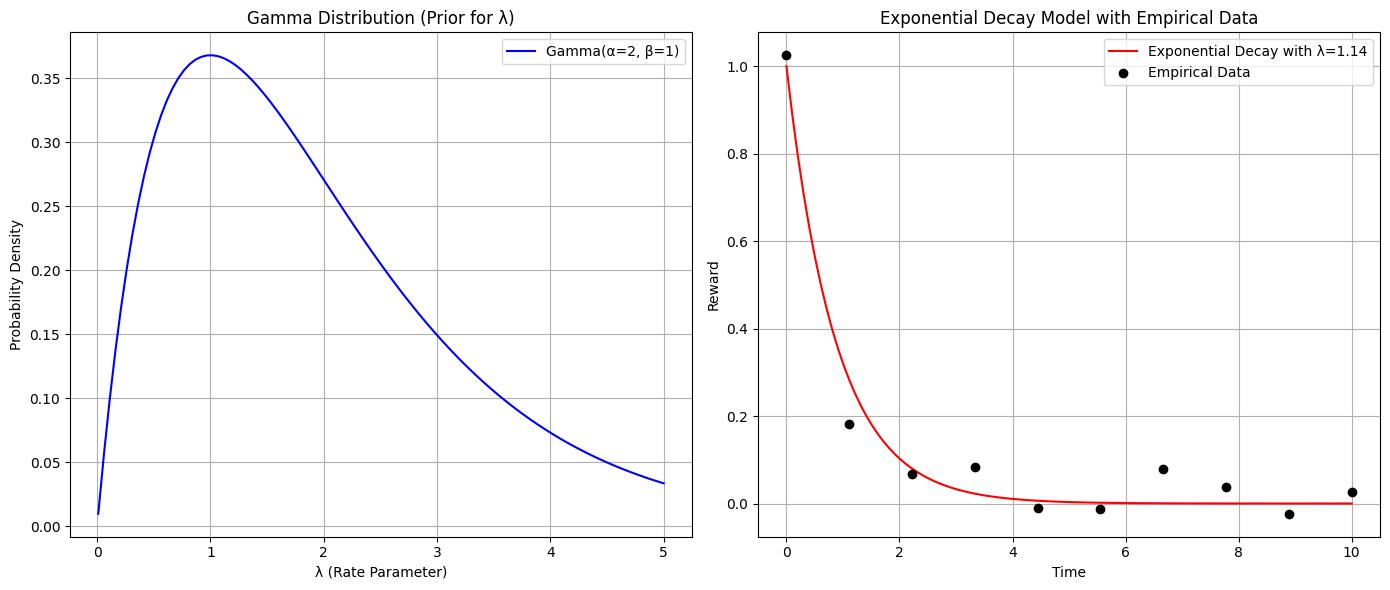

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

np.random.seed(42)  # For reproducibility

# Generate some example empirical data points that follow an exponential decay pattern
empirical_time = np.linspace(0, 10, 10)
true_lambda = 1.5  # True rate parameter for generating empirical data
empirical_rewards = np.exp(-true_lambda * empirical_time) + np.random.normal(0, 0.05, len(empirical_time))  # Adding noise


# Define the parameters for the Gamma distribution (prior)
alpha = 2
beta = 1

# Create an array of lambda values (rate parameters)
lambda_values = np.linspace(0.01, 5, 100)

# Calculate the Gamma distribution (prior) values
gamma_pdf = gamma.pdf(lambda_values, alpha, scale=1/beta)

# Define an example exponential decay model using a sampled lambda
sampled_lambda = np.random.gamma(alpha, 1 / beta)
time = np.linspace(0, 10, 100)
decay_model = np.exp(-sampled_lambda * time)


# Plotting the Gamma distribution (prior)
plt.figure(figsize=(14, 6))

# Subplot 1: Gamma distribution (prior)
plt.subplot(1, 2, 1)
plt.plot(lambda_values, gamma_pdf, label=f'Gamma(α={alpha}, β={beta})', color='blue')
plt.title('Gamma Distribution (Prior for λ)')
plt.xlabel('λ (Rate Parameter)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

# Subplot 2: Exponential decay model with sampled lambda and empirical data points
plt.subplot(1, 2, 2)
plt.plot(time, decay_model, label=f'Exponential Decay with λ={sampled_lambda:.2f}', color='red')
plt.scatter(empirical_time, empirical_rewards, color='black', label='Empirical Data', zorder=5)
plt.title('Exponential Decay Model with Empirical Data')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


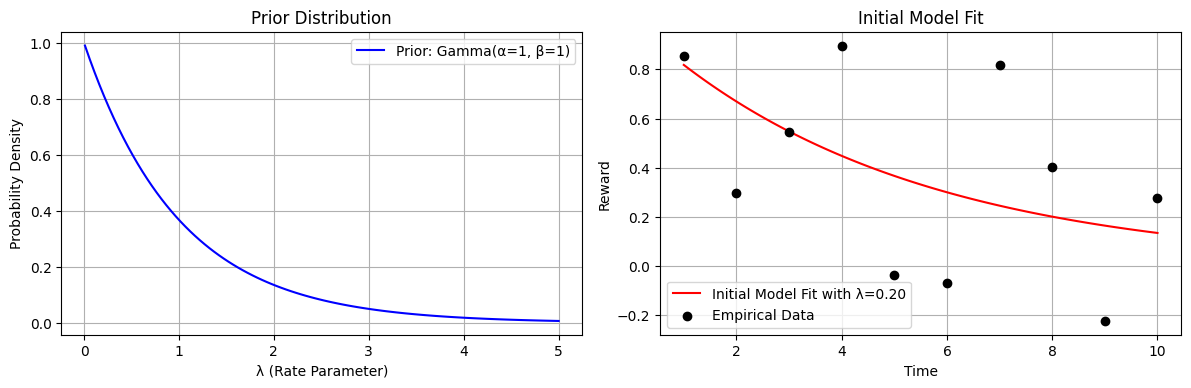

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



# Generate some example empirical data points that follow an exponential decay pattern
np.random.seed(42)  # For reproducibility
empirical_time = np.linspace(1, 10, 10)
true_lambda = 0.5  # True rate parameter for generating empirical data
empirical_rewards = np.exp(-true_lambda * empirical_time) + np.random.normal(0, 0.5, len(empirical_time))  # Adding noise

# Define initial parameters for the Gamma distribution (prior)
alpha_prior = 1
beta_prior = 1

# Initialize parameters for posterior updates
alpha = alpha_prior
beta = beta_prior

# Initialize plotting
plt.figure(figsize=(18, 18))

# Plot initial prior and fit
lambda_values = np.linspace(0.01, 5, 100)
gamma_pdf_prior = gamma.pdf(lambda_values, alpha_prior, scale=1/beta_prior)
time = np.linspace(1, 10, 100)
sampled_lambda_prior = np.random.gamma(alpha_prior, 1 / beta_prior)
decay_model_prior = np.exp(-sampled_lambda_prior * time)

plt.subplot(5, 3, 1)
plt.plot(lambda_values, gamma_pdf_prior, label=f'Prior: Gamma(α={alpha_prior}, β={beta_prior})', color='blue')
plt.title('Prior Distribution')
plt.xlabel('λ (Rate Parameter)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

plt.subplot(5, 3, 2)
plt.plot(time, decay_model_prior, label=f'Initial Model Fit with λ={sampled_lambda_prior:.2f}', color='red')
plt.scatter(empirical_time, empirical_rewards, color='black', label='Empirical Data', zorder=5)
plt.title('Initial Model Fit')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


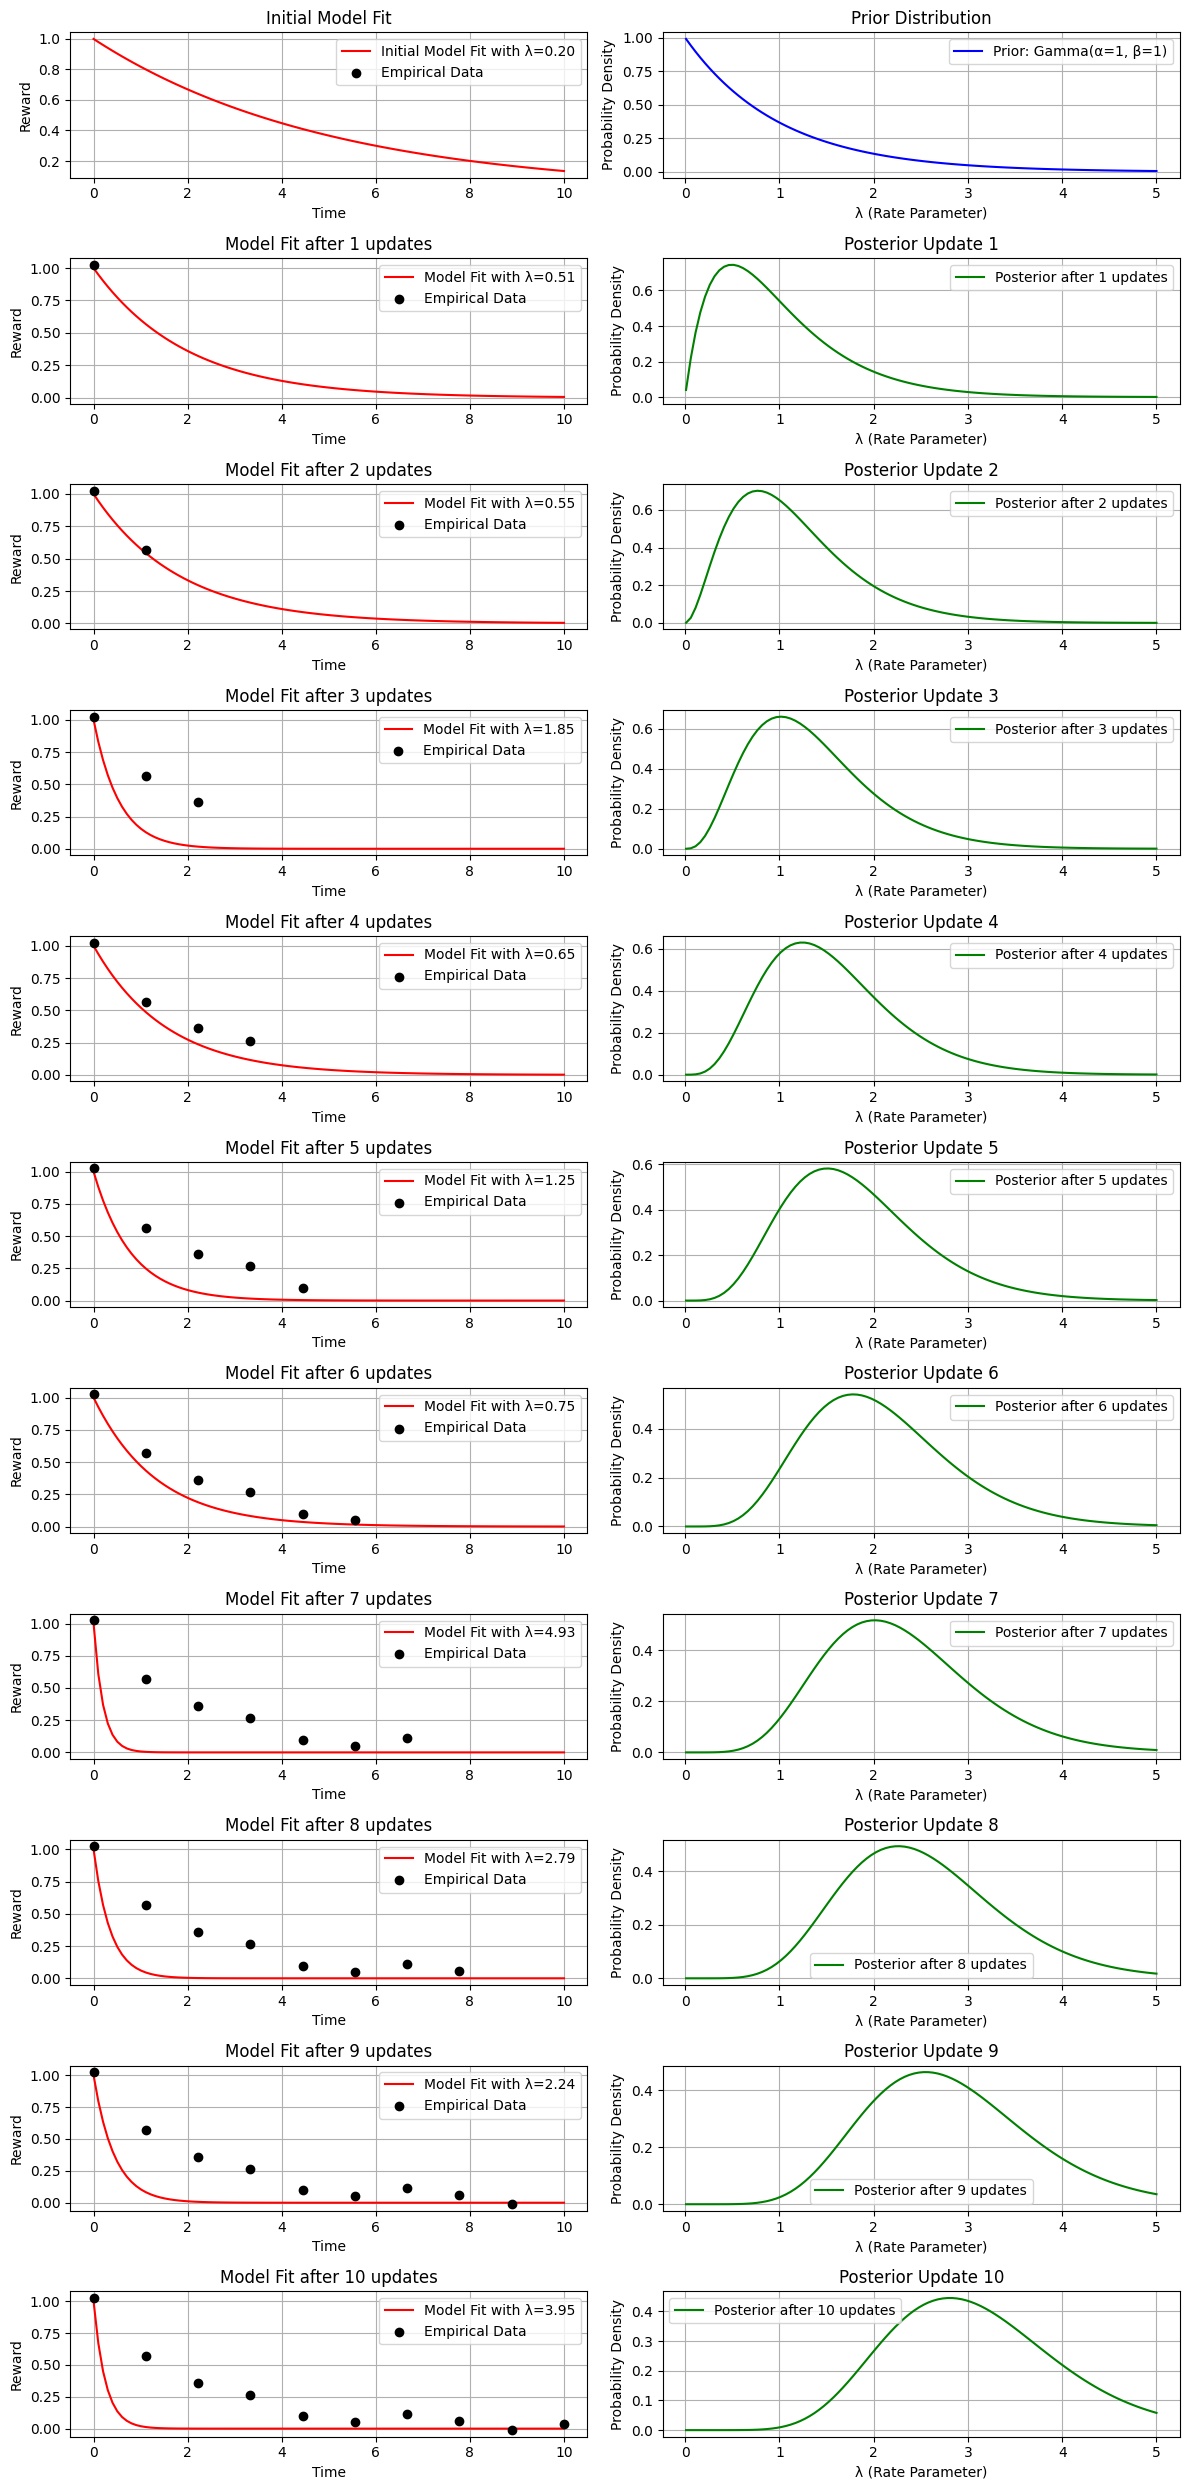

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define initial parameters for the Gamma distribution (prior)
alpha_prior = 1
beta_prior = 1

# Generate some example empirical data points that follow an exponential decay pattern
np.random.seed(42)  # For reproducibility
empirical_time = np.linspace(0, 10, 10)
true_lambda = 0.5  # True rate parameter for generating empirical data
empirical_rewards = np.exp(-true_lambda * empirical_time) + np.random.normal(0, 0.05, len(empirical_time))  # Adding noise

# Function to update Gamma posterior with new data point (rate parameter observation)
def update_posterior(alpha, beta, new_data):
    # For each observation, we treat it as an exponential decay, update posterior
    alpha_updated = alpha + 1  # Each new data point increments the shape parameter
    beta_updated = beta + new_data  # The new data point increments the rate parameter
    return alpha_updated, beta_updated

# Initialize parameters for posterior updates
alpha = alpha_prior
beta = beta_prior

# Initialize plotting
plt.figure(figsize=(12, 25))

# Plot initial prior and initial model fit
lambda_values = np.linspace(0.01, 5, 100)
gamma_pdf_prior = gamma.pdf(lambda_values, alpha_prior, scale=1/beta_prior)
time = np.linspace(0, 10, 100)
sampled_lambda_prior = np.random.gamma(alpha_prior, 1 / beta_prior)
decay_model_prior = np.exp(-sampled_lambda_prior * time)

# Initial plots
plt.subplot(11, 2, 1)
plt.plot(time, decay_model_prior, label=f'Initial Model Fit with λ={sampled_lambda_prior:.2f}', color='red')
plt.scatter(empirical_time[:0], empirical_rewards[:0], color='black', label='Empirical Data', zorder=5)
plt.title('Initial Model Fit')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()

plt.subplot(11, 2, 2)
plt.plot(lambda_values, gamma_pdf_prior, label=f'Prior: Gamma(α={alpha_prior}, β={beta_prior})', color='blue')
plt.title('Prior Distribution')
plt.xlabel('λ (Rate Parameter)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

# Sequentially update posterior and plot after each new empirical data point
for i, reward in enumerate(empirical_rewards):
    # Update posterior with each new observation
    alpha, beta = update_posterior(alpha, beta, reward)
    gamma_pdf_posterior = gamma.pdf(lambda_values, alpha, scale=1/beta)
    sampled_lambda = np.random.gamma(alpha, 1 / beta)
    decay_model = np.exp(-sampled_lambda * time)
    
    # Plot model fit with added empirical data point
    plt.subplot(11, 2, i * 2 + 3)
    plt.plot(time, decay_model, label=f'Model Fit with λ={sampled_lambda:.2f}', color='red')
    plt.scatter(empirical_time[:i + 1], empirical_rewards[:i + 1], color='black', label='Empirical Data', zorder=5)
    plt.title(f'Model Fit after {i + 1} updates')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.legend()
    
    # Plot updated posterior
    plt.subplot(11, 2, i * 2 + 4)
    plt.plot(lambda_values, gamma_pdf_posterior, label=f'Posterior after {i + 1} updates', color='green')
    plt.title(f'Posterior Update {i + 1}')
    plt.xlabel('λ (Rate Parameter)')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [29]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

iteration 0 reward 2.0248357076505616 alpha: 1 beta: 1
iteration 1 reward 1.2061481043667077 alpha: 2 beta: 1.0
iteration 2 reward 0.7681433092479193 alpha: 3 beta: 1.2590283341017843
iteration 3 reward 0.5224118131172609 alpha: 4 beta: 1.5821175100690068
iteration 4 reward 0.2589628977370586 alpha: 5 beta: 1.9208144234073958
iteration 5 reward 0.15246314940033856 alpha: 6 beta: 2.33212623236086
iteration 6 reward 0.17853477751109748 alpha: 7 beta: 2.763179719136575
iteration 7 reward 0.09876650330228244 alpha: 8 beta: 3.110102637706217
iteration 8 reward 0.013157558480720751 alpha: 9 beta: 3.487663304251032
iteration 9 reward 0.04934599525578284 alpha: 10 beta: 4.0472463555089


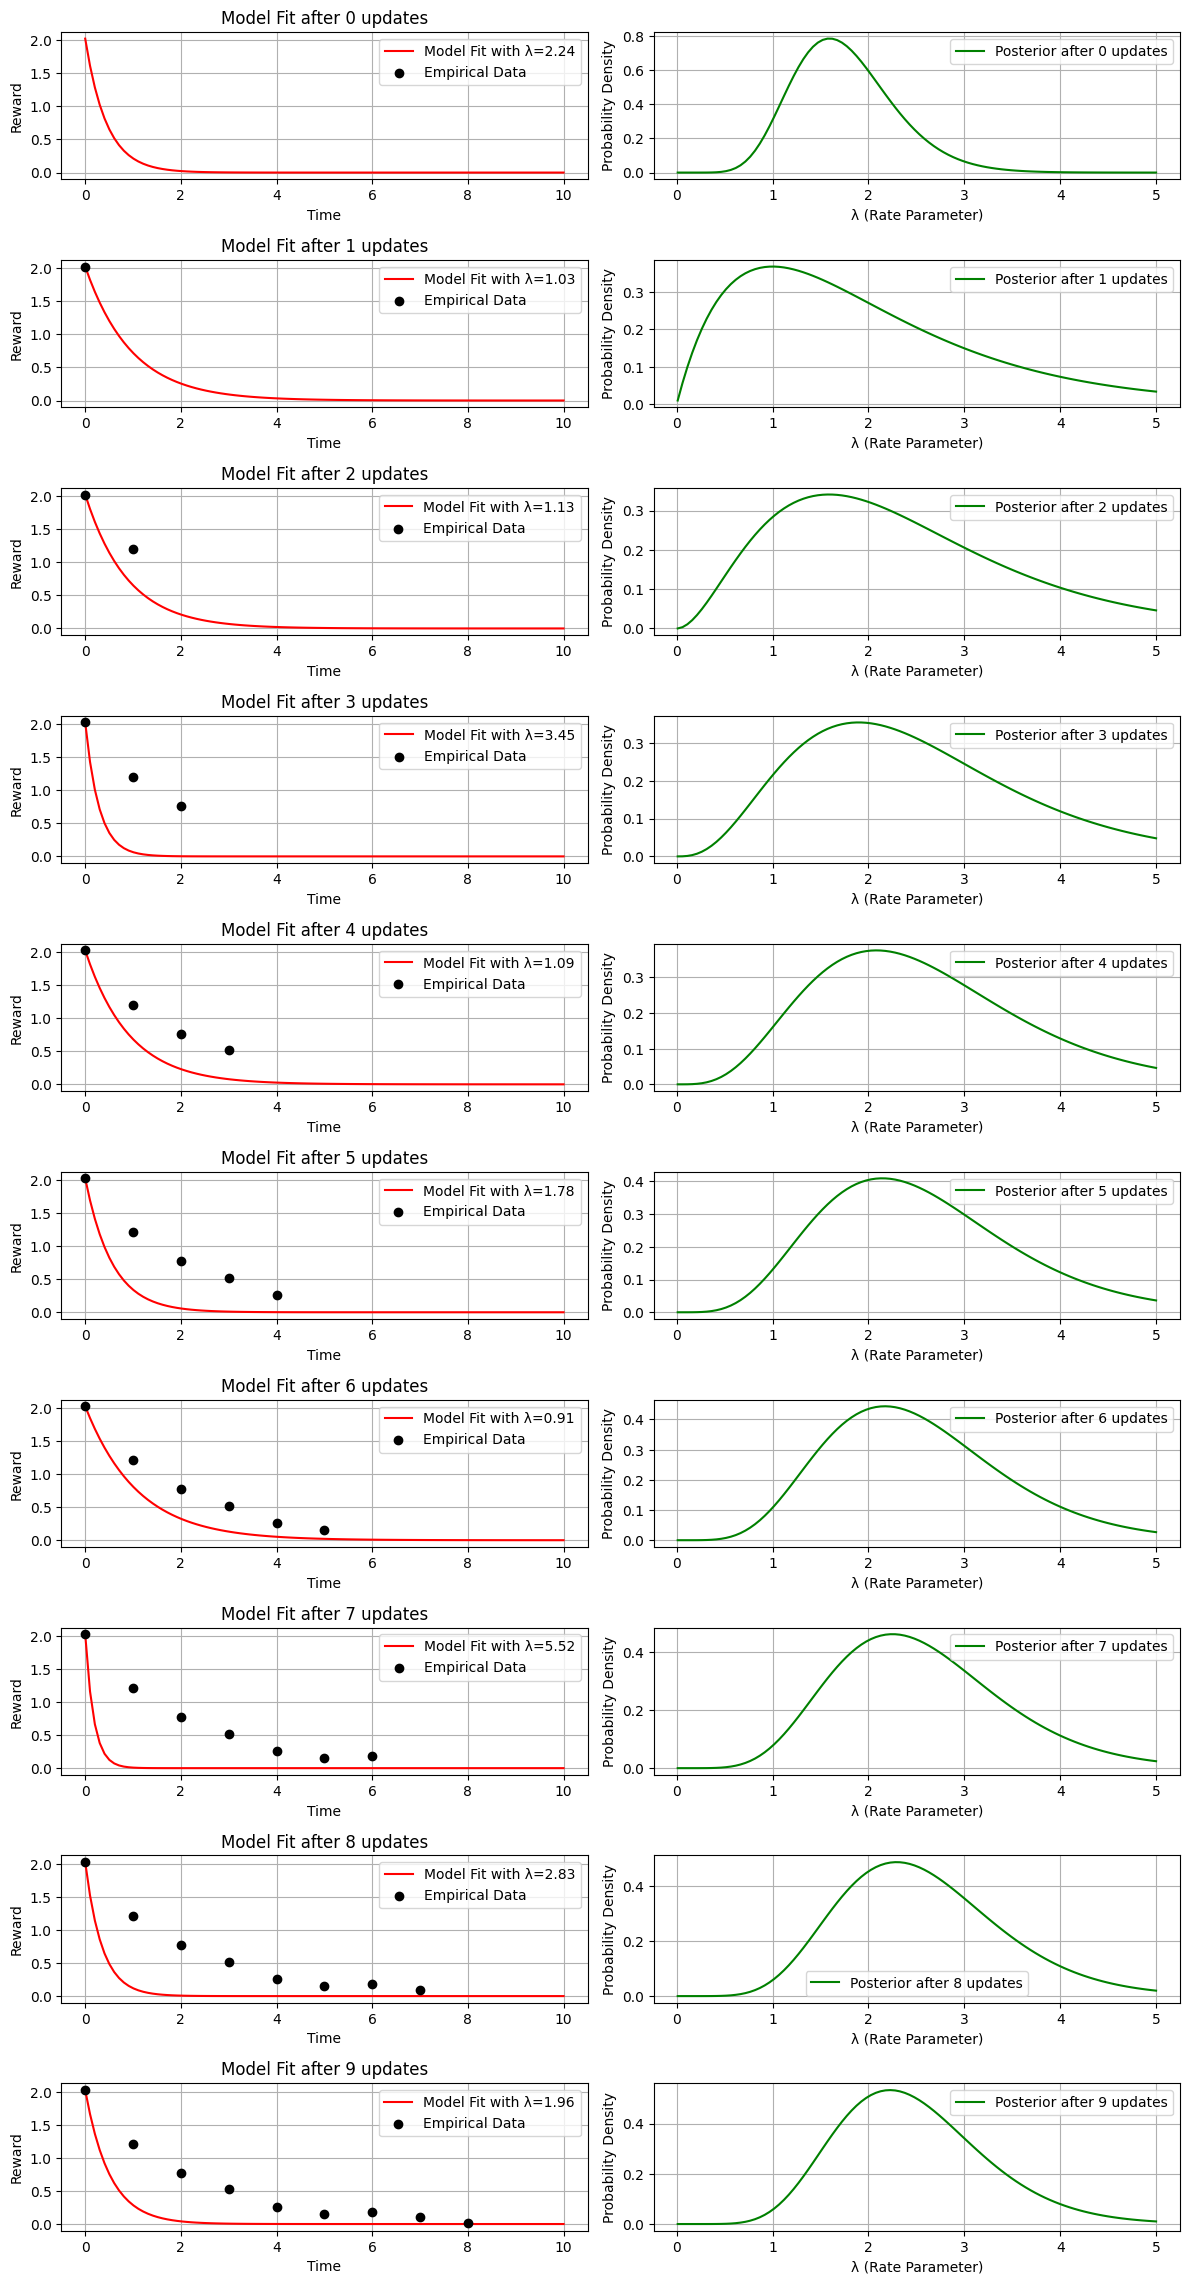

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define initial parameters for the Gamma distribution (prior)
alpha_prior = 1
beta_prior = 1

# Generate some example empirical data points that follow an exponential decay pattern
np.random.seed(42)  # For reproducibility
empirical_time = np.arange(0,10)
true_lambda = 0.5  # True rate parameter for generating empirical data
true_inital = 2
empirical_rewards = true_inital * np.exp(-true_lambda * empirical_time) + np.random.normal(0, 0.05, len(empirical_time))  # Adding noise
empirical_rewards = np.maximum(empirical_rewards, 10e-6)  # Clamp to avoid negatives


# Function to update Gamma posterior with new data point using estimated decay rate
def update_posterior(alpha, beta, observed_loss, timestep, initial_loss):

    alpha_updated = alpha + 1
    estimated_decay_rate = np.log(initial_loss / observed_loss) / timestep
    # print('estimated_decay_rate',estimated_decay_rate)
    # beta_updated = beta + observed_loss#
    beta_updated = beta + estimated_decay_rate  

    return alpha_updated, beta_updated

# Initialize parameters for posterior updates
alpha = alpha_prior
beta = beta_prior
initial_loss = 1

# Initialize plotting
plt.figure(figsize=(12, 25))

# Plot initial prior and initial model fit
lambda_values = np.linspace(0.01, 5, 100)
gamma_pdf_prior = gamma.pdf(lambda_values, alpha_prior, scale=1/beta_prior)
time = np.linspace(0, 10, 100)
sampled_lambda_prior = np.random.gamma(alpha_prior, 1 / beta_prior)
decay_model_prior = initial_loss * np.exp(-sampled_lambda_prior * time)

# Initial plots
# plt.subplot(11, 2, 1)
# plt.plot(time, decay_model_prior, label=f'Initial Model Fit with λ={sampled_lambda_prior:.2f}', color='red')
# plt.scatter(empirical_time[:0], empirical_rewards[:0], color='black', label='Empirical Data', zorder=5)
# plt.title('Initial Model Fit')
# plt.xlabel('Time')
# plt.ylabel('Reward')
# plt.grid(True)
# plt.legend()

# plt.subplot(11, 2, 2)
# plt.plot(lambda_values, gamma_pdf_prior, label=f'Prior: Gamma(α={alpha_prior}, β={beta_prior})', color='blue')
# plt.title('Prior Distribution')
# plt.xlabel('λ (Rate Parameter)')
# plt.ylabel('Probability Density')
# plt.grid(True)
# plt.legend()

# Sequentially update posterior and plot after each new empirical data point
for i,reward in zip(empirical_time, empirical_rewards):
    i = int(i)
    # print(i, reward)
    # Set the initial loss on the first observation
    
    # Plot model fit with added empirical data point
    plt.subplot(11, 2, i * 2 + 3)
    plt.plot(time, decay_model, label=f'Model Fit with λ={sampled_lambda:.2f}', color='red')
    plt.scatter(empirical_time[:i ], empirical_rewards[:i], color='black', label='Empirical Data', zorder=5)
    plt.title(f'Model Fit after {i } updates')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.legend()
    
    # Plot updated posterior
    plt.subplot(11, 2, i * 2 + 4)
    plt.plot(lambda_values, gamma_pdf_posterior, label=f'Posterior after {i } updates', color='green')
    plt.title('')
    plt.xlabel('λ (Rate Parameter)')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

    if i == 0:
        initial_loss = reward  # Set the initial observed loss for scaling

    # Update posterior with each new observation using the estimated decay rate
    print('iteration',i,'reward', reward, 'alpha:',alpha,'beta:', beta)
    alpha, beta = update_posterior(alpha, beta, reward, empirical_time[i]+1, initial_loss)
    gamma_pdf_posterior = gamma.pdf(lambda_values, alpha, scale=1/beta)
    sampled_lambda = np.random.gamma(alpha, 1 / beta)
    decay_model = initial_loss * np.exp(-sampled_lambda * time)

plt.tight_layout()
plt.show()
